In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from ucimlrepo import fetch_ucirepo

from DBScan import DBScan

%matplotlib inline

## KMeans Clustering from scratch

In [2]:
# fetch dataset from UCIrivine repo
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes) 
X = np.asarray(iris.data.features, dtype=np.float32)
y = np.asarray(pd.factorize(iris.data.targets['class'])[0], dtype=np.int16)



### The EM Algoritm for KMeans

In [3]:
def k_means(X, k=10, max_iterations=50, threshold=0.0001, metric='euclidean'):
    mu_arr = X[np.random.choice(len(X), k, replace=False)]
    pi = None
    obj = np.inf

    for _ in range(max_iterations):
        pi = np.zeros((len(X), k), dtype=np.ushort)
        # E-step
        distances = sc.spatial.distance.cdist(X, mu_arr, metric=metric)
        c_labels = np.argmin(distances, axis=1)
        for i in range(len(c_labels)):
            pi[i, c_labels[i]] = 1  # Set new labels

        # M-step
        for j in range(k):
            elements_of_j = np.where(c_labels == j)
            mu_arr[j] = np.mean(X[elements_of_j], axis=0)

        new_obj = np.sum(pi * distances)
        if float(abs(obj - new_obj)) < (obj * threshold):  # termination criterion
            break
        obj = new_obj

    return obj, pi, mu_arr

In [4]:
_, pi, mus = k_means(X, k=3, max_iterations=50, metric='euclidean')
c_labels_euclid = np.argwhere(pi == 1)[:, 1]

In [5]:
dbscan = DBScan(epsilon=0.05, min_pts=50, metric='cosine')
dbscan.fit(X)
db_clusters = dbscan.transform()
print(np.unique(db_clusters))

[1 2 3]


### Visualizing clusters with PCA

In [6]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)


Text(0.5, 1.0, 'Iris: PCA, true labels')

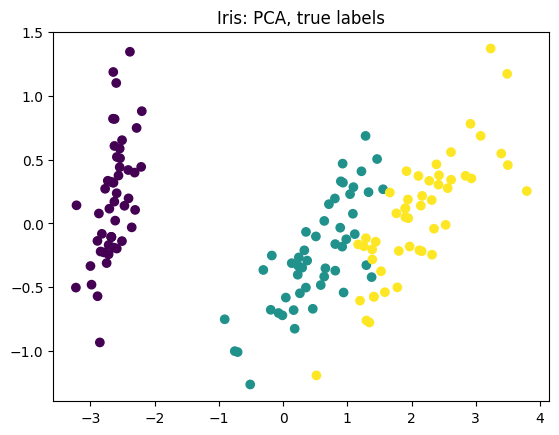

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Iris: PCA, true labels")

Text(0.5, 1.0, 'Iris: PCA, K-Means clusters with euclidean distance')

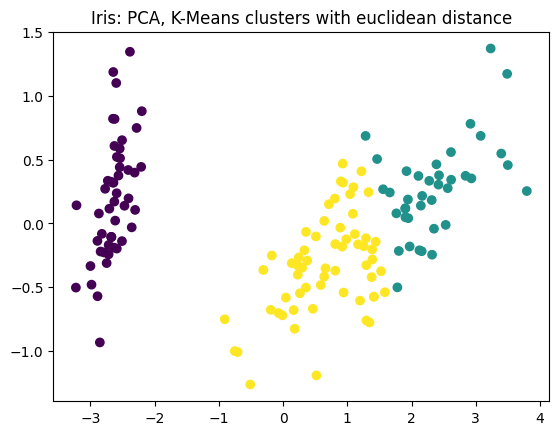

In [8]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=c_labels_euclid)
plt.title("Iris: PCA, K-Means clusters with euclidean distance")

Text(0.5, 1.0, 'Iris: PCA, DBScan clusters with cosine distance')

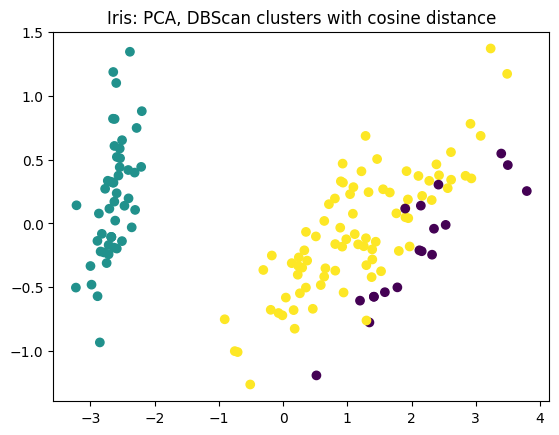

In [15]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=db_clusters)
plt.title("Iris: PCA, DBScan clusters with cosine distance")

### Performance Evaluation

In [10]:
# Silhouette score with euclidean distance 
silhouette_score(X, c_labels_euclid)

0.5509644

In [11]:
_, pi, mus = k_means(X, k=3, max_iterations=50, metric='cosine')
c_labels_cosine = np.argwhere(pi == 1)[:, 1]

Text(0.5, 1.0, 'Iris: PCA, true labels')

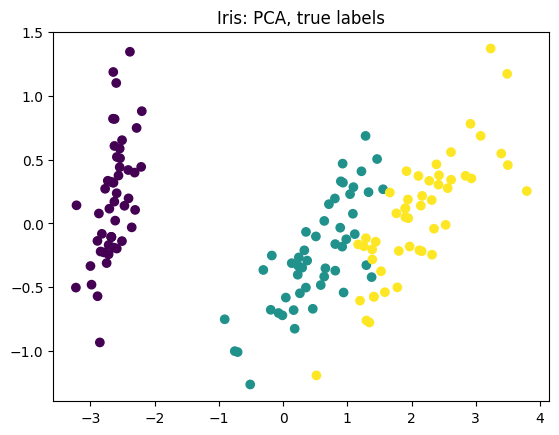

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Iris: PCA, true labels")

Text(0.5, 1.0, 'Iris: PCA, K-Means clusters with cosine distance')

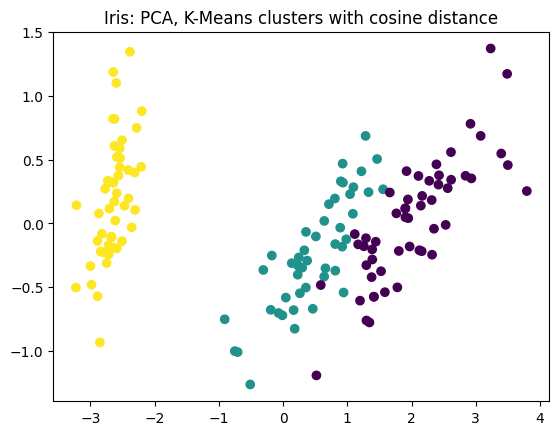

In [13]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=c_labels_cosine)
plt.title("Iris: PCA, K-Means clusters with cosine distance")

In [14]:
# Silhouette score with euclidean distance 
silhouette_score(X, c_labels_cosine)

0.4939753

Although cosine distance show cluster labels closer to true labels, it's silhouette score shows that it underperforms.